In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as pl
import os
from preprocessing.noise_removal import preprocess_string


In [3]:
df_src = pd.read_csv(pl.Path(os.path.abspath('')).parent.resolve() / "data_files/processed_csv/summarized_corpus_valset2.csv")


In [4]:
df = df_src.copy()
df

,id,domain,orig_type,scraped_at,type,words,content_len,mean_word_len,median_word_len,split
0,9684638.0,nytimes.com,reliable,2018-02-11 00:48:01.619836,reliable,"{'petti': 3, 'complet': 1, 'pass': 5, 'cotton'...",3322,5.026408,4.0,6
1,8486467.0,nytimes.com,reliable,2018-02-11 00:36:08.462112,reliable,"{'outset': 1, 'first': 2, 'match': 2, 'pilot':...",1264,5.458128,5.0,7
2,8699302.0,nytimes.com,reliable,2018-02-11 00:38:14.808471,reliable,"{'baton': 1, 'roug': 1, 'man': 2, 'forc': 1, '...",467,4.376471,4.0,8
3,8997443.0,nytimes.com,reliable,2018-02-11 00:41:07.513779,reliable,"{'daughter': 1, 'dr': 2, 'paul': 1, 'ny': 3, '...",1001,5.119497,5.0,9
4,1862051.0,pravda.ru,bias,2017-11-10T11:18:44.524042,fake,"{'na': 8, 'ukrain': 1, 'nachali': 1, 'rossiisk...",1820,7.543379,7.0,8
...,...,...,...,...,...,...,...,...,...,...
2774314,9153728.0,nytimes.com,reliable,2018-02-11 00:42:35.664094,reliable,"{'market': 1, 'look': 2, 'direct': 1, 'recent'...",1489,4.968127,4.0,3
2774315,9870712.0,nytimes.com,reliable,2018-02-11 00:49:45.199995,reliable,"{'how': 2, 'think': 1, 'feel': 2, 'prison': 5,...",318,4.096774,3.0,5
2774316,9140554.0,nytimes.com,reliable,2018-02-11 00:42:28.789188,reliable,"{'chart': 2, 'articl': 1, 'wednesday': 1, 'leg...",254,5.243902,4.0,8
2774317,NaN,nytimes.com,reliable,2018-02-11 00:49:52.111090,reliable,"{'hous': 13, 'author': 13, 'resid': 4, 'audien...",6261,4.996098,4.0,5


In [5]:
df.isnull().sum()

id                 1
domain             0
orig_type          0
scraped_at         0
type               0
words              0
content_len        0
mean_word_len      0
median_word_len    0
split              0
dtype: int64

In [21]:
df['type'].value_counts()

reliable    1438022
fake        1336296
Name: type, dtype: int64

In [6]:
df = df.drop(2774317)
#df.sort_values(by="mean_word_len",ascending=False)


In [7]:
liar_path = (pl.Path(os.path.abspath('')).parent.resolve() / "data_files/train.tsv")
df_liar = pd.read_csv(liar_path, delimiter='\t')

In [8]:
new_df = pd.DataFrame({
       'type': df_liar['false'],
       'words': df_liar['Says the Annies List political group supports third-trimester abortions on demand.']
})
#viewing unique columns in dataframe
new_df['type'].unique()
new_df['orig_type'] = new_df['type'] # keeping orig type for later
new_df['id'] = [i for i in range(len(new_df))] # adding id column
new_df

,type,words,orig_type,id
0,half-true,When did the decline of coal start? It started...,half-true,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,1
2,false,Health care reform legislation is likely to ma...,false,2
3,half-true,The economic turnaround started at the end of ...,half-true,3
4,true,The Chicago Bears have had more starting quart...,true,4
...,...,...,...,...
10234,mostly-true,There are a larger number of shark attacks in ...,mostly-true,10234
10235,mostly-true,Democrats have now become the party of the [At...,mostly-true,10235
10236,half-true,Says an alternative to Social Security that op...,half-true,10236
10237,false,On lifting the U.S. Cuban embargo and allowing...,false,10237


In [9]:
# we disregard the middle labels
new_df['type'] = new_df['type'].map({'true': 'reliable', 'mostly-true': 'reliable', 'false': 'fake', 'pants-fire': 'fake'})
# 'half-true': 'reliable', 'barely-true': 'fake',
new_df

,type,words,orig_type,id
0,NaN,When did the decline of coal start? It started...,half-true,0
1,reliable,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,1
2,fake,Health care reform legislation is likely to ma...,false,2
3,NaN,The economic turnaround started at the end of ...,half-true,3
4,reliable,The Chicago Bears have had more starting quart...,true,4
...,...,...,...,...
10234,reliable,There are a larger number of shark attacks in ...,mostly-true,10234
10235,reliable,Democrats have now become the party of the [At...,mostly-true,10235
10236,NaN,Says an alternative to Social Security that op...,half-true,10236
10237,fake,On lifting the U.S. Cuban embargo and allowing...,false,10237


In [10]:
content_len = new_df['words'].apply(len)
print(content_len.sum()/ len(content_len))

new_df['words'] = new_df['words'].apply(preprocess_string)

new_df = new_df.dropna(subset =['type'], how = 'any', axis = 0)
new_df

106.92118370934662


,type,words,orig_type,id
1,reliable,"{'hillari': 1, 'clinton': 1, 'agre': 1, 'with'...",mostly-true,1
2,fake,"{'health': 1, 'care': 1, 'reform': 1, 'legisl'...",false,2
4,reliable,"{'the': 4, 'chicago': 1, 'bear': 1, 'have': 1,...",true,4
8,reliable,"{'say': 1, 'gop': 1, 'primari': 1, 'oppon': 1,...",mostly-true,8
9,reliable,"{'for': 1, 'the': 4, 'first': 1, 'time': 1, 'i...",mostly-true,9
...,...,...,...,...
10232,fake,"{'mayor': 1, 'fung': 1, 'want': 1, 'to': 2, 'p...",pants-fire,10232
10234,reliable,"{'there': 2, 'are': 2, 'a': 1, 'larger': 1, 'n...",mostly-true,10234
10235,reliable,"{'democrat': 1, 'have': 1, 'now': 1, 'becom': ...",mostly-true,10235
10237,fake,"{'on': 1, 'lift': 1, 'the': 1, 'us': 1, 'cuban...",false,10237


In [20]:
bow_content_len = new_df['words'].apply(lambda x: len(x.keys()))
print(bow_content_len.sum()/ len(bow_content_len))
#print(new_df['type'].value_counts())

15.963684129191778


,type,words,orig_type,id
1,reliable,"{'hillari': 1, 'clinton': 1, 'agre': 1, 'with'...",mostly-true,1
2,fake,"{'health': 1, 'care': 1, 'reform': 1, 'legisl'...",false,2
4,reliable,"{'the': 4, 'chicago': 1, 'bear': 1, 'have': 1,...",true,4
8,reliable,"{'say': 1, 'gop': 1, 'primari': 1, 'oppon': 1,...",mostly-true,8
9,reliable,"{'for': 1, 'the': 4, 'first': 1, 'time': 1, 'i...",mostly-true,9
...,...,...,...,...
10232,fake,"{'mayor': 1, 'fung': 1, 'want': 1, 'to': 2, 'p...",pants-fire,10232
10234,reliable,"{'there': 2, 'are': 2, 'a': 1, 'larger': 1, 'n...",mostly-true,10234
10235,reliable,"{'democrat': 1, 'have': 1, 'now': 1, 'becom': ...",mostly-true,10235
10237,fake,"{'on': 1, 'lift': 1, 'the': 1, 'us': 1, 'cuban...",false,10237


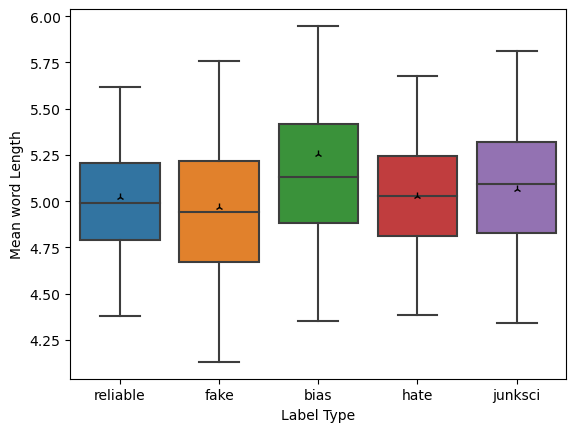

In [18]:
# mean word length by Label type
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='mean_word_len', data=df, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('Mean word Length')
#plt.title('Distribution of Content Length by Mean Word Length')

# show the plot
plt.show()

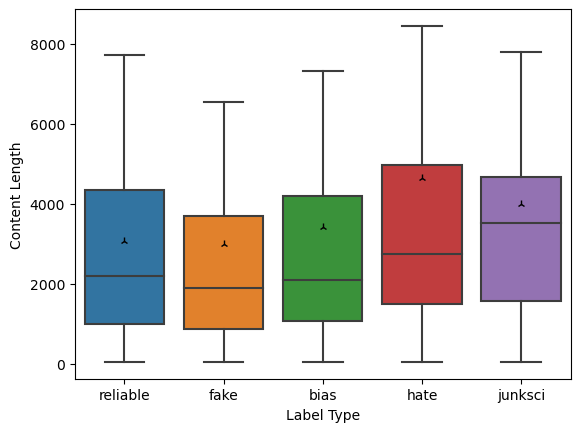

In [19]:
# Content length by Label type
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='content_len', data=df, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('Content Length')
#plt.title('Distribution of Content Length by Label Type') # titles/captions are added in 

# show the plot
plt.show()

### Preprocessing and analysis of News column

- Indhent de to dataframes
- - oprindelige data: id, type
- - splits: id, split
- Merge de to dataframes og sammenlign med 
- - merge ( on="id", left-merge eller inner <- interesction)
- Sort på duplicate id lookup == True
- type.value_counts()
- evt. to_csv så vi har dataen

In [11]:
df3 = df.copy()
df3 = df3[:300000]

In [12]:
import ast
print(type(df3.words[0]))
df3['words'] = df3['words'].apply(ast.literal_eval)
print(type(df3.words[0]))

<class 'str'>
<class 'dict'>


In [13]:
df3['bow_len'] = df3['words'].apply(lambda x: len(x.keys()))


In [14]:
df3

,id,domain,orig_type,scraped_at,type,words,content_len,mean_word_len,median_word_len,split,bow_len
0,9684638.0,nytimes.com,reliable,2018-02-11 00:48:01.619836,reliable,"{'petti': 3, 'complet': 1, 'pass': 5, 'cotton'...",3322,5.026408,4.0,6,198
1,8486467.0,nytimes.com,reliable,2018-02-11 00:36:08.462112,reliable,"{'outset': 1, 'first': 2, 'match': 2, 'pilot':...",1264,5.458128,5.0,7,83
2,8699302.0,nytimes.com,reliable,2018-02-11 00:38:14.808471,reliable,"{'baton': 1, 'roug': 1, 'man': 2, 'forc': 1, '...",467,4.376471,4.0,8,40
3,8997443.0,nytimes.com,reliable,2018-02-11 00:41:07.513779,reliable,"{'daughter': 1, 'dr': 2, 'paul': 1, 'ny': 3, '...",1001,5.119497,5.0,9,58
4,1862051.0,pravda.ru,bias,2017-11-10T11:18:44.524042,fake,"{'na': 8, 'ukrain': 1, 'nachali': 1, 'rossiisk...",1820,7.543379,7.0,8,59
...,...,...,...,...,...,...,...,...,...,...,...
299995,9178745.0,nytimes.com,reliable,2018-02-11 00:42:49.854453,reliable,"{'photo': 1, 'class': 5, 'shown': 1, 'select':...",3148,5.007874,5.0,8,227
299996,6706442.0,patriotpost.us,bias,2017-11-27T01:15:02.476695,fake,"{'patriot': 1, 'post': 1, 'r': 1, 'heaven': 5,...",10992,4.369898,4.0,5,566
299997,9316454.0,nytimes.com,reliable,2018-02-11 00:44:11.869835,reliable,"{'got': 1, 'hustl': 1, 'here': 2, 'bend': 3, '...",3737,4.534669,4.0,3,229
299998,2105438.0,healthimpactnews.com,junksci,2017-11-10T11:18:44.524042,fake,"{'dr': 2, 'mercola': 1, 'today': 2, 'launch': ...",12953,5.022945,4.0,4,465


In [15]:
df3['bow_len'].sum() / len(df3['bow_len'])

172.25222666666667

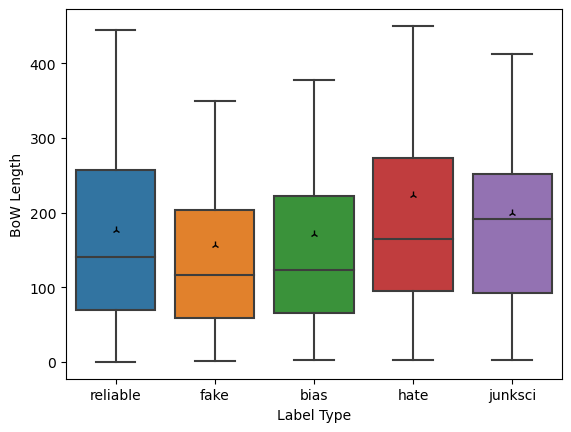

In [16]:
# BAG OF WORDS length by Label type FAKENEWSCORPUS
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='bow_len', data=df3, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('BoW Length')
#plt.title('Distribution of Content Length by Mean Word Length')

# show the plot
plt.show()

In [ ]:
# BAG OF WORDS length by Label type LIAR DATASET
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='', data=df3, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('BoW Length')
#plt.title('Distribution of Content Length by Mean Word Length')

# show the plot
plt.show()

In [50]:
# Use DictVectorizer to transform bag_of_words column
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer()

D = df2['words']
bag_of_words_matrix = vectorizer.fit_transform(D)

In [51]:
bag_of_words_matrix

<20000x13675 sparse matrix of type '<class 'numpy.float64'>'
	with 3409732 stored elements in Compressed Sparse Row format>

In [52]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()
feature_names[4340:4360]

array(['farfetch', 'farflung', 'fargo', 'farley', 'farm', 'farmer',
       'farmhous', 'farmingdal', 'farmland', 'farrar', 'farreach',
       'farrel', 'farright', 'farther', 'fascin', 'fascism', 'fascist',
       'fashion', 'faso', 'fassel'], dtype=object)

In [53]:
# Convert matrix to dataframe
bag_of_words_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words_matrix, columns=feature_names)

In [54]:
# Concatenate article_id column and bag_of_words_df
result = pd.concat([df2['id'],df2['type'],df2['content_len'], bag_of_words_df], axis=1)

In [55]:
result

,id,type,content_len,+,00,000,0000,0000a,0000b,000k,...,zone,zoo,zucchini,zucker,zuckerberg,zuma,zurich,|,||,~
0,9292489,reliable,2312,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9441160,reliable,12634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8660443,reliable,1349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5999415,fake,1771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4593771,fake,700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8998900,reliable,2406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,8870869,reliable,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,6361465,fake,3484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,9075674,reliable,2642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting text into Vectors
Before converting the data into vectors, split it into train and test.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
  
x_train, x_test, y_train, y_test = train_test_split(df2['words'], 
                                                    df2['type'], 
                                                    test_size=0.20)

In [113]:
vectorizer = DictVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)  

### Model training, Evaluation, and Prediction
Now, the dataset is ready to train the model.

For training we will use Naive Bayes and evaluate the prediction accuracy using accuracy_score.

### Multinominal Naive Bayes Model
In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
Source: Sci-kit learn https://scikit-learn.org/stable/modules/naive_bayes.html

In [143]:
from sklearn.metrics import f1_score, balanced_accuracy_score as bas
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1, force_alpha=True)
mnb.fit(x_train, y_train)
print(mnb.predict(x_train[1:2]))

# testing the model
print(accuracy_score(y_train, mnb.predict(x_train)))
print(accuracy_score(y_test, mnb.predict(x_test)))
print(f1_score(y_test, mnb.predict(x_test), average="weighted"))
print(bas(y_test, mnb.predict(x_test)))

['reliable']
0.87753125
0.8757
0.8784924073689577
0.876725426433417


The confusion matrix for Naive Bayes can be implemented with the code below.

In [141]:
from sklearn.metrics import f1_score, balanced_accuracy_score as bas
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB(alpha=1, force_alpha=True)
cnb.fit(x_train, y_train)
print(cnb.predict(x_train[1:2]))

# testing the model
print(accuracy_score(y_train, cnb.predict(x_train)))
print(accuracy_score(y_test, cnb.predict(x_test)))
print(f1_score(y_test, cnb.predict(x_test), average="weighted"))
print(bas(y_test, cnb.predict(x_test)))

['reliable']
0.87465625
0.87295
0.8762125202887393
0.8784115250286653


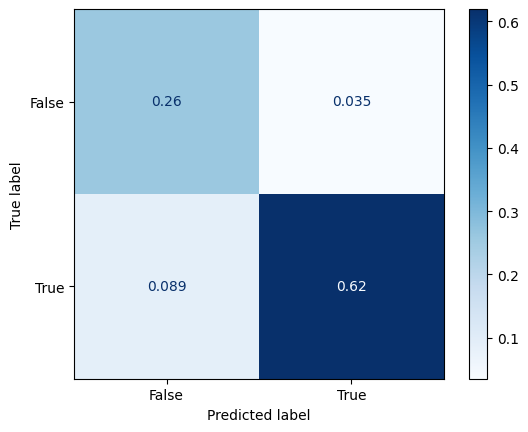

In [124]:
# Confusion matrix of Results from Multinominal Naive Bayes (mnb)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, mnb.predict(x_test), normalize="all")
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot(cmap="Blues")
plt.show()

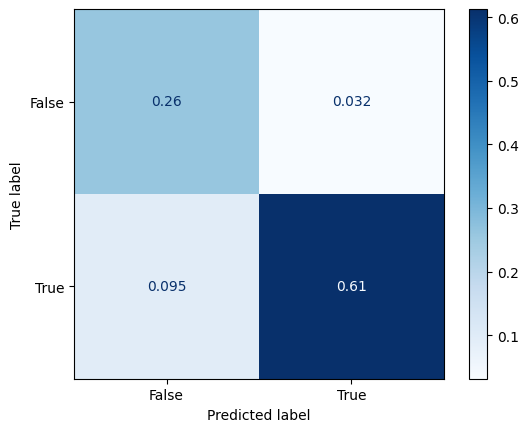

In [123]:
# Confusion matrix of Results from Complement Naive Bayes (cnb)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, cnb.predict(x_test), normalize="all")
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot(cmap="Blues")
plt.show()